# 訓練済みモデルダウンロード

In [1]:
# EfficientDet D0 512x512
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz
# SSD MobileNet V2 FPNLite 320x320
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
# SSD ResNet50 V1 FPN 640x640 (RetinaNet50)
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
# Faster R-CNN ResNet50 V1 640x640
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz
# CenterNet Resnet50 V1 FPN 512x512
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_resnet50_v1_fpn_512x512_coco17_tpu-8.tar.gz
# CenterNet MobileNetV2 FPN 512x512
!wget http://download.tensorflow.org/models/object_detection/tf2/20210210/centernet_mobilenetv2fpn_512x512_coco17_od.tar.gz

--2022-02-14 13:59:32--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.253.62.128, 2607:f8b0:4004:c07::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.253.62.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30736482 (29M) [application/x-tar]
Saving to: ‘efficientdet_d0_coco17_tpu-32.tar.gz’

efficientdet_d0_coc 100%[===================>]  29.31M  80.7MB/s    in 0.4s    

2022-02-14 13:59:32 (80.7 MB/s) - ‘efficientdet_d0_coco17_tpu-32.tar.gz’ saved [30736482/30736482]

--2022-02-14 13:59:32--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.65.80, 2607:f8b0:4004:c07::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.65.80|:80... connected.
HTTP r

In [2]:
!tar -xvf efficientdet_d0_coco17_tpu-32.tar.gz
!tar -xvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
!tar -xvf ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
!tar -xvf faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz
!tar -xvf centernet_resnet50_v1_fpn_512x512_coco17_tpu-8.tar.gz
!tar -xvf centernet_mobilenetv2fpn_512x512_coco17_od.tar.gz

efficientdet_d0_coco17_tpu-32/
efficientdet_d0_coco17_tpu-32/checkpoint/
efficientdet_d0_coco17_tpu-32/checkpoint/ckpt-0.data-00000-of-00001
efficientdet_d0_coco17_tpu-32/checkpoint/checkpoint
efficientdet_d0_coco17_tpu-32/checkpoint/ckpt-0.index
efficientdet_d0_coco17_tpu-32/pipeline.config
efficientdet_d0_coco17_tpu-32/saved_model/
efficientdet_d0_coco17_tpu-32/saved_model/saved_model.pb
efficientdet_d0_coco17_tpu-32/saved_model/assets/
efficientdet_d0_coco17_tpu-32/saved_model/variables/
efficientdet_d0_coco17_tpu-32/saved_model/variables/variables.data-00000-of-00001
efficientdet_d0_coco17_tpu-32/saved_model/variables/variables.index
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite_32

# TensorFlow → ONNX 変換

In [3]:
!pip install tf2onnx

     |████████████████████████████████| 435 kB 20.6 MB/s 
     |████████████████████████████████| 12.7 MB 58 kB/s 
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 2.0
    Uninstalling flatbuffers-2.0:
      Successfully uninstalled flatbuffers-2.0


In [4]:
!python -m tf2onnx.convert \
    --opset 12 \
    --saved-model 'efficientdet_d0_coco17_tpu-32/saved_model' \
    --output efficientdet_d0.onnx

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2022-02-14 14:00:03,592 - WARNING - '--tag' not specified for saved_model. Using --tag serve
2022-02-14 14:00:12,846 - WARNING - Importing a function (__inference___call___32344) with ops with unsaved custom gradients. Will likely fail if a gradient is requested.
2022-02-14 14:00:17,384 - WARNING - Importing a function (__inference_EfficientDet-D0_layer_call_and_return_conditional_losses_97451) with ops with unsaved custom gradients. Will likely fail if a gradient is requested.
2022-02-14 14:00:20,930 - WARNING - Importing a function (__inference_bifpn_layer_call_and_return_conditional_losses_77595) with ops with unsaved custom gradients. Will likely fail if a gradient is requested.
2022-02-14 14:00:21,932 - WARNING - Importing a function (__inference

In [5]:
!python -m tf2onnx.convert \
    --opset 12 \
    --saved-model 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model' \
    --output ssd_mobilenet_v2_fpnlite_320x320.onnx

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2022-02-14 14:02:37,875 - WARNING - '--tag' not specified for saved_model. Using --tag serve
2022-02-14 14:02:53,765 - INFO - Signatures found in model: [serving_default].
2022-02-14 14:02:53,765 - WARNING - '--signature_def' not specified, using first signature: serving_default
2022-02-14 14:02:53,767 - INFO - Output names: ['detection_anchor_indices', 'detection_boxes', 'detection_classes', 'detection_multiclass_scores', 'detection_scores', 'num_detections', 'raw_detection_boxes', 'raw_detection_scores']
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
2022-02-14 14:03:10,698 - WARNING - From /usr/local/lib/python3.7/dist-packages/tf2onnx/tf_loader.py:706: extract_sub_graph (from tensorflow.python.framework.graph_util_impl)

In [6]:
!python -m tf2onnx.convert \
    --opset 12 \
    --saved-model 'ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model' \
    --output retinanet50.onnx

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2022-02-14 14:04:04,174 - WARNING - '--tag' not specified for saved_model. Using --tag serve
2022-02-14 14:04:19,504 - INFO - Signatures found in model: [serving_default].
2022-02-14 14:04:19,504 - WARNING - '--signature_def' not specified, using first signature: serving_default
2022-02-14 14:04:19,507 - INFO - Output names: ['detection_anchor_indices', 'detection_boxes', 'detection_classes', 'detection_multiclass_scores', 'detection_scores', 'num_detections', 'raw_detection_boxes', 'raw_detection_scores']
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
2022-02-14 14:04:39,195 - WARNING - From /usr/local/lib/python3.7/dist-packages/tf2onnx/tf_loader.py:706: extract_sub_graph (from tensorflow.python.framework.graph_util_impl)

In [7]:
!python -m tf2onnx.convert \
    --opset 12 \
    --saved-model 'faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model' \
    --output faster_rcnn_resnet50_v1_640x640.onnx

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2022-02-14 14:05:48,052 - WARNING - '--tag' not specified for saved_model. Using --tag serve
2022-02-14 14:05:57,951 - INFO - Signatures found in model: [serving_default].
2022-02-14 14:05:57,951 - WARNING - '--signature_def' not specified, using first signature: serving_default
2022-02-14 14:05:57,953 - INFO - Output names: ['detection_anchor_indices', 'detection_boxes', 'detection_classes', 'detection_multiclass_scores', 'detection_scores', 'num_detections', 'raw_detection_boxes', 'raw_detection_scores']
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
2022-02-14 14:06:12,515 - WARNING - From /usr/local/lib/python3.7/dist-packages/tf2onnx/tf_loader.py:706: extract_sub_graph (from tensorflow.python.framework.graph_util_impl)

In [8]:
!python -m tf2onnx.convert \
    --opset 12 \
    --saved-model 'centernet_resnet50_v1_fpn_512x512_coco17_tpu-8/saved_model' \
    --output centernet_resnet50_v1_fpn_512x512.onnx

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2022-02-14 14:07:20,325 - WARNING - '--tag' not specified for saved_model. Using --tag serve
2022-02-14 14:07:35,340 - INFO - Signatures found in model: [serving_default].
2022-02-14 14:07:35,340 - WARNING - '--signature_def' not specified, using first signature: serving_default
2022-02-14 14:07:35,342 - INFO - Output names: ['detection_boxes', 'detection_classes', 'detection_scores', 'num_detections']
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
2022-02-14 14:07:38,615 - WARNING - From /usr/local/lib/python3.7/dist-packages/tf2onnx/tf_loader.py:706: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph

In [9]:
!python -m tf2onnx.convert \
    --opset 12 \
    --saved-model 'centernet_mobilenetv2_fpn_od/saved_model' \
    --output centernet_mobilenetv2_fpn.onnx

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2022-02-14 14:08:01,534 - WARNING - '--tag' not specified for saved_model. Using --tag serve
2022-02-14 14:08:16,882 - INFO - Signatures found in model: [serving_default].
2022-02-14 14:08:16,882 - WARNING - '--signature_def' not specified, using first signature: serving_default
2022-02-14 14:08:16,884 - INFO - Output names: ['output_0', 'output_1', 'output_2', 'output_3']
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
2022-02-14 14:08:18,719 - WARNING - From /usr/local/lib/python3.7/dist-packages/tf2onnx/tf_loader.py:706: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
2022-

# 推論テスト

In [10]:
!pip install onnxruntime
!pip install imread_from_url==0.1.2

     |████████████████████████████████| 4.9 MB 13.6 MB/s 
  Created wheel for imread-from-url: filename=imread_from_url-0.1.2-py3-none-any.whl size=6564 sha256=5533d3483582e96c7d35509bbbf556697f80f1d4886e895d643b6397570d8992
  Stored in directory: /root/.cache/pip/wheels/10/c4/e7/f5517a33d5b3bd6e32bba66ec56c2183037510439325a029d5
Successfully built imread-from-url


In [11]:
from imread_from_url import imread_from_url

image = imread_from_url('https://www.pakutaso.com/shared/img/thumb/bakarizmPAR57045_TP_V4.jpg')

### SSD, EfficientDet, Faster R-CNNテスト

In [12]:
import onnxruntime

# input_shape = (512, 512)
# model_path = 'efficientdet_d0.onnx'
# input_shape = (320, 320)
# model_path = 'ssd_mobilenet_v2_fpnlite_320x320.onnx'
input_shape = (640, 640)
model_path = 'retinanet50.onnx'
# input_shape = (640, 640)
# model_path = 'faster_rcnn_resnet50_v1_640x640.onnx'

onnx_session = onnxruntime.InferenceSession(
    model_path,
    providers=['CUDAExecutionProvider', 'CPUExecutionProvider'],
)

input_details = onnx_session.get_inputs()
output_details = onnx_session.get_outputs()

/usr/local/lib/python3.7/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:56: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  "Available providers: '{}'".format(name, ", ".join(available_provider_names)))


In [13]:
print(input_details[0])

NodeArg(name='input_tensor', type='tensor(uint8)', shape=[1, 'unk__4863', 'unk__4864', 3])


In [14]:
print(output_details[0])
print(output_details[1])
print(output_details[2])
print(output_details[3])
print(output_details[4])
print(output_details[5])
print(output_details[6])
print(output_details[7])

NodeArg(name='detection_anchor_indices', type='tensor(float)', shape=[1, 'unk__4865'])
NodeArg(name='detection_boxes', type='tensor(float)', shape=[1, 'unk__4866', 'unk__4867'])
NodeArg(name='detection_classes', type='tensor(float)', shape=[1, 'unk__4868'])
NodeArg(name='detection_multiclass_scores', type='tensor(float)', shape=[1, 'unk__4869', 'unk__4870'])
NodeArg(name='detection_scores', type='tensor(float)', shape=[1, 'unk__4871'])
NodeArg(name='num_detections', type='tensor(float)', shape=[1])
NodeArg(name='raw_detection_boxes', type='tensor(float)', shape=[1, 51150, 4])
NodeArg(name='raw_detection_scores', type='tensor(float)', shape=[1, 51150, 91])


In [15]:
import cv2
import numpy as np

input_image = cv2.resize(image, dsize=input_shape)
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
input_image = np.expand_dims(input_image, axis=0).astype('uint8')

input_name = onnx_session.get_inputs()[0].name
result = onnx_session.run(None, {input_name: input_image})

num_detections = int(result[5][0])
detection_classes = result[2][0]
detection_boxes = result[1][0]
detection_scores = result[4][0]

In [16]:
import copy

debug_image = copy.deepcopy(image)
image_width, image_height = image.shape[1], image.shape[0]

score_th = 0.7

for index in range(num_detections):
    score = detection_scores[index]
    bbox = detection_boxes[index]
    class_id = int(detection_classes[index])

    if score < score_th:
        continue

    x1, y1 = int(bbox[1] * image_width), int(bbox[0] * image_height)
    x2, y2 = int(bbox[3] * image_width), int(bbox[2] * image_height)

    cv2.putText(
        debug_image, 'ID:' + str(class_id) + '({:.3f})'.format(score),
        (x1, y1 - 15), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2,
        cv2.LINE_AA)
    cv2.rectangle(debug_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

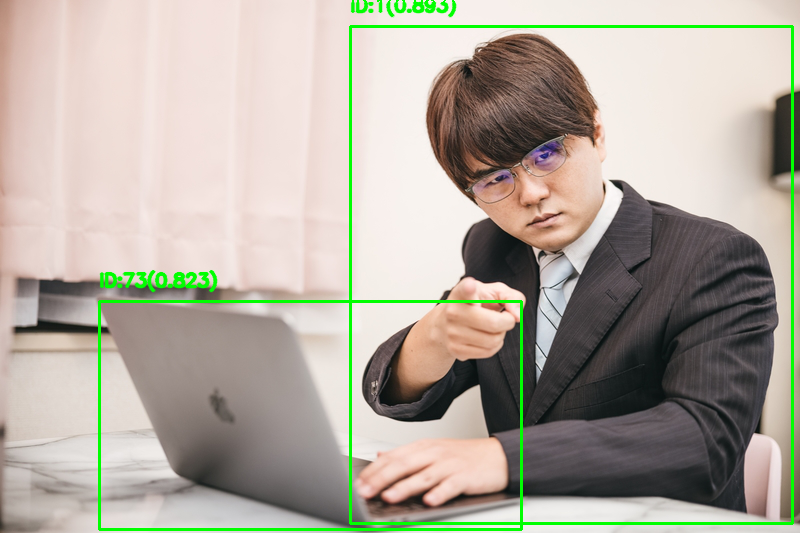

In [17]:
from google.colab.patches import cv2_imshow

cv2_imshow(debug_image)

### CenterNet MobileNetV2 FPNテスト

In [18]:
import onnxruntime

input_shape = (512, 512)
model_path = 'centernet_resnet50_v1_fpn_512x512.onnx'
# input_shape = (320, 320)
# model_path = 'centernet_mobilenetv2_fpn.onnx'

onnx_session = onnxruntime.InferenceSession(
    model_path,
    providers=['CUDAExecutionProvider', 'CPUExecutionProvider'],
)

input_details = onnx_session.get_inputs()
output_details = onnx_session.get_outputs()

/usr/local/lib/python3.7/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:56: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  "Available providers: '{}'".format(name, ", ".join(available_provider_names)))


In [19]:
print(input_details[0])

NodeArg(name='input_tensor', type='tensor(uint8)', shape=[1, 'unk__1331', 'unk__1332', 3])


In [20]:
print(output_details[0])
print(output_details[1])
print(output_details[2])
print(output_details[3])

NodeArg(name='detection_boxes', type='tensor(float)', shape=[1, 100, 4])
NodeArg(name='detection_classes', type='tensor(float)', shape=[1, 100])
NodeArg(name='detection_scores', type='tensor(float)', shape=[1, 100])
NodeArg(name='num_detections', type='tensor(float)', shape=[1])


In [21]:
import cv2
import numpy as np

input_image = cv2.resize(image, dsize=input_shape)
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
input_image = np.expand_dims(input_image, axis=0).astype('uint8')

input_name = onnx_session.get_inputs()[0].name
result = onnx_session.run(None, {input_name: input_image})

num_detections = int(result[3][0])
detection_classes = result[1][0]
detection_boxes = result[0][0]
detection_scores = result[2][0]

In [22]:
import copy

debug_image = copy.deepcopy(image)
image_width, image_height = image.shape[1], image.shape[0]

score_th = 0.6

for index in range(num_detections):
    score = detection_scores[index]
    bbox = detection_boxes[index]
    class_id = int(detection_classes[index])

    if score < score_th:
        continue

    x1, y1 = int(bbox[1] * image_width), int(bbox[0] * image_height)
    x2, y2 = int(bbox[3] * image_width), int(bbox[2] * image_height)

    cv2.putText(
        debug_image, 'ID:' + str(class_id) + '({:.3f})'.format(score),
        (x1, y1 - 15), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2,
        cv2.LINE_AA)
    cv2.rectangle(debug_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

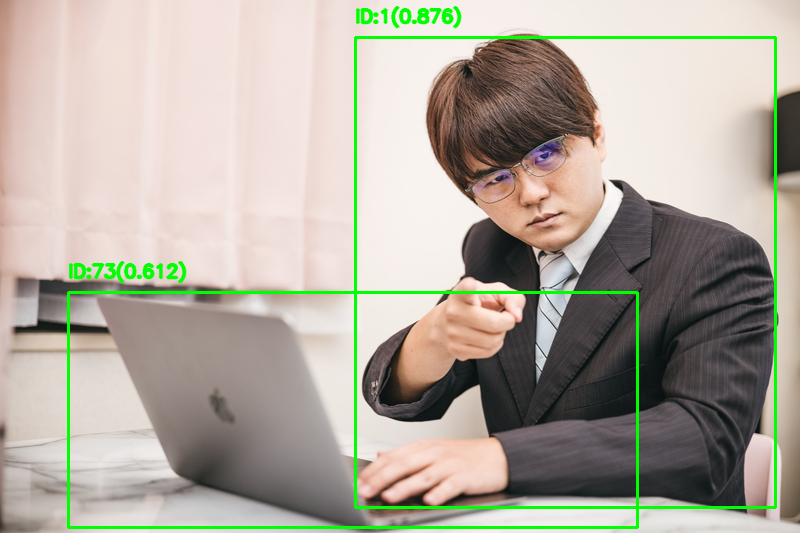

In [23]:
from google.colab.patches import cv2_imshow

cv2_imshow(debug_image)